## Project Title: Leveraging Machine Learning for the Early Detection of Hypertension Through Routine Health Parameters.

**Hello! I'm Ajibulu Oyindamola Pamilerin, a passionate AI/ML enthusiast dedicated to leveraging Artificial Intelligence and Machine Learning to develop user-friendly solutions that address real-world problems, especially in the Healthcare sector. I believe in building models that are not just technically sound, but also accessible, ethical and impactful**


In [1]:
# Import necesaary libraries
import pandas as pd
import numpy as np

In [2]:
# Load the Dataset that contains patient's health records form a CSV file.
df = pd.read_csv('heart.csv')
 

# View the first few rows to understand the data structure and feature names.
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# View the last few rows to check for any anomalies or patterns that may not be visible from the top rows.
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
# Check the distribution of the target variable to know how many patients are hypertensive (1) and non-hypertensive (0)
print(df['target'].value_counts())

target
1    165
0    138
Name: count, dtype: int64


In [5]:
# Check the shape of the data to know the number of rows (samples) and columns (features).
df.shape

(303, 14)

In [6]:
# To understand the summary of the Dataset Structure.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# To check for Basic Statistics such as Mean, Std, Min, Max, which will help to understand data distribution and detect outliers.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


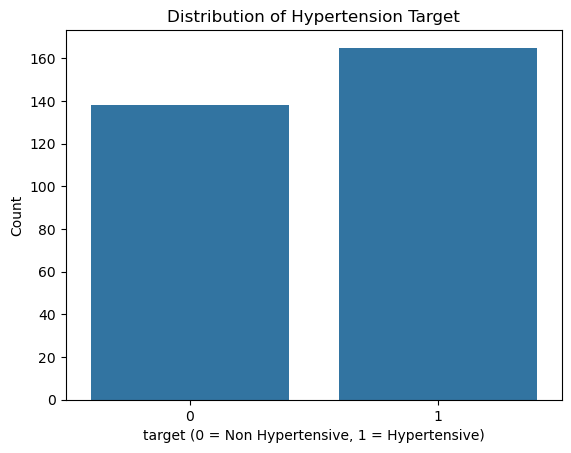

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title('Distribution of Hypertension Target')
plt.xlabel('target (0 = Non Hypertensive, 1 = Hypertensive)')
plt.ylabel('Count')
plt.show()

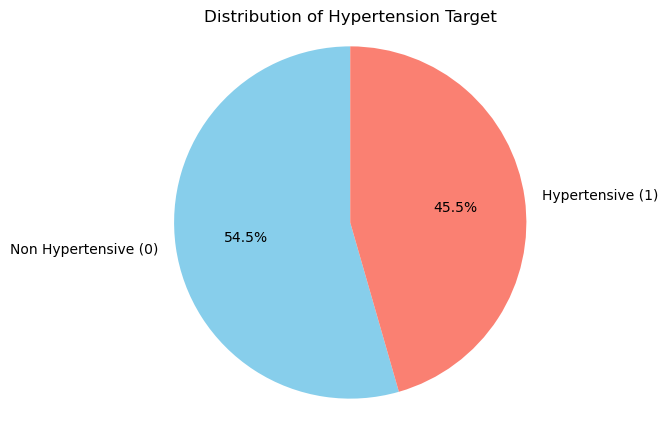

In [9]:
# Count the occurrences of each outcome
outcome_counts = df['target'].value_counts()

# Labels for the pie chart
labels = ['Non Hypertensive (0)', 'Hypertensive (1)']

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(outcome_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Distribution of Hypertension Target')
plt.axis('equal')
plt.show()


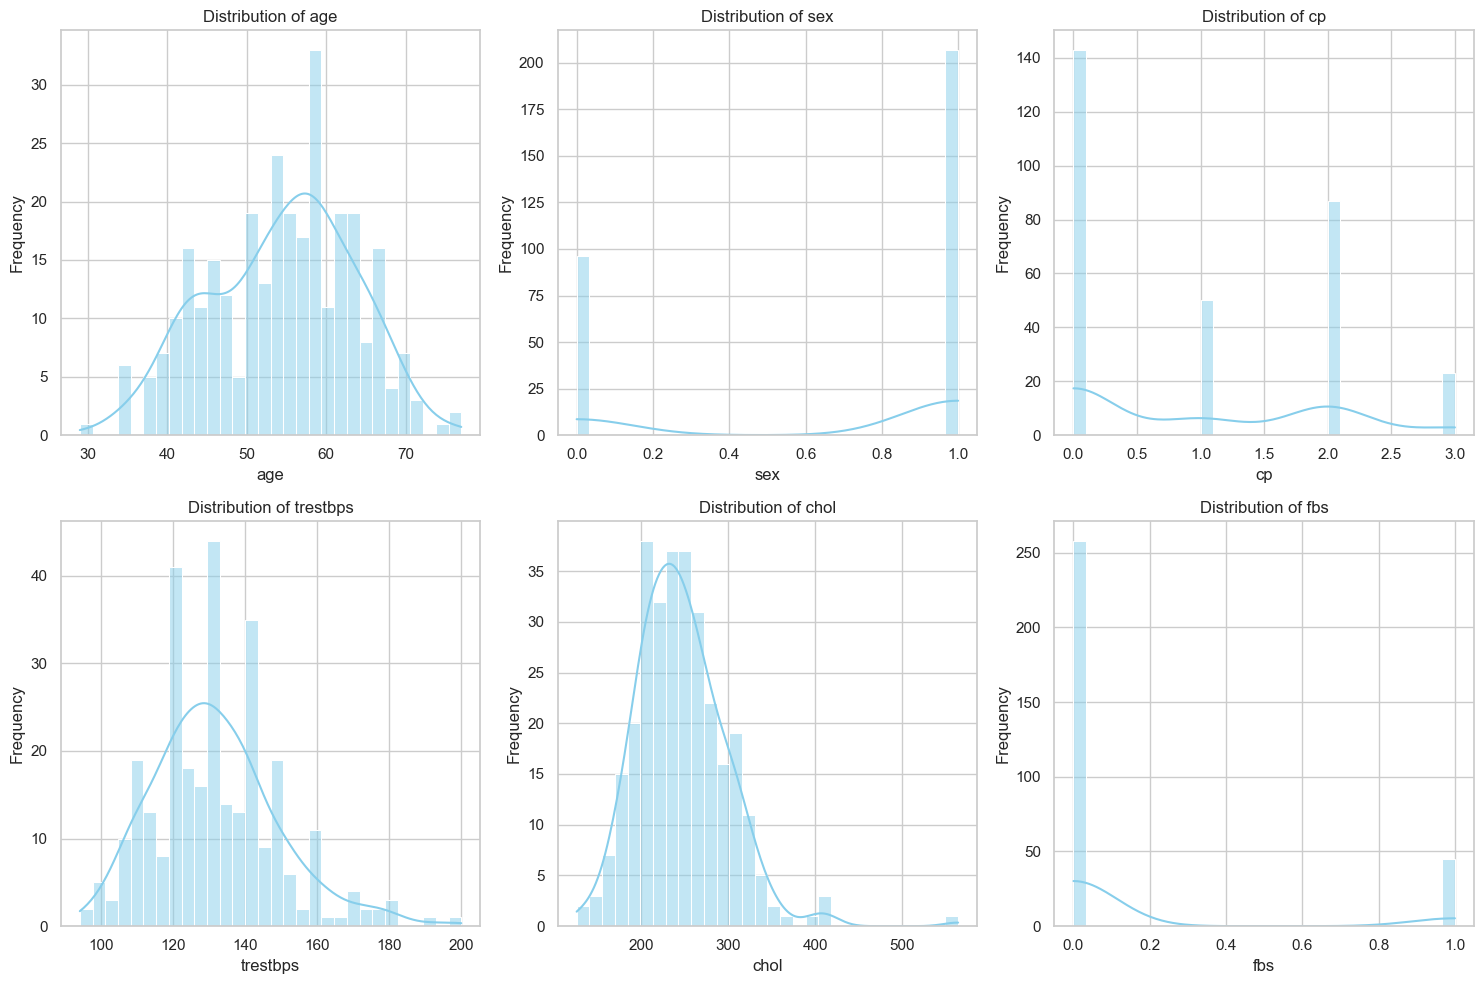

In [10]:
# Plot Histograms for Features

# Set a consistent style
sns.set(style='whitegrid')

# Define columns to plot
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs']

# Plot histograms
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

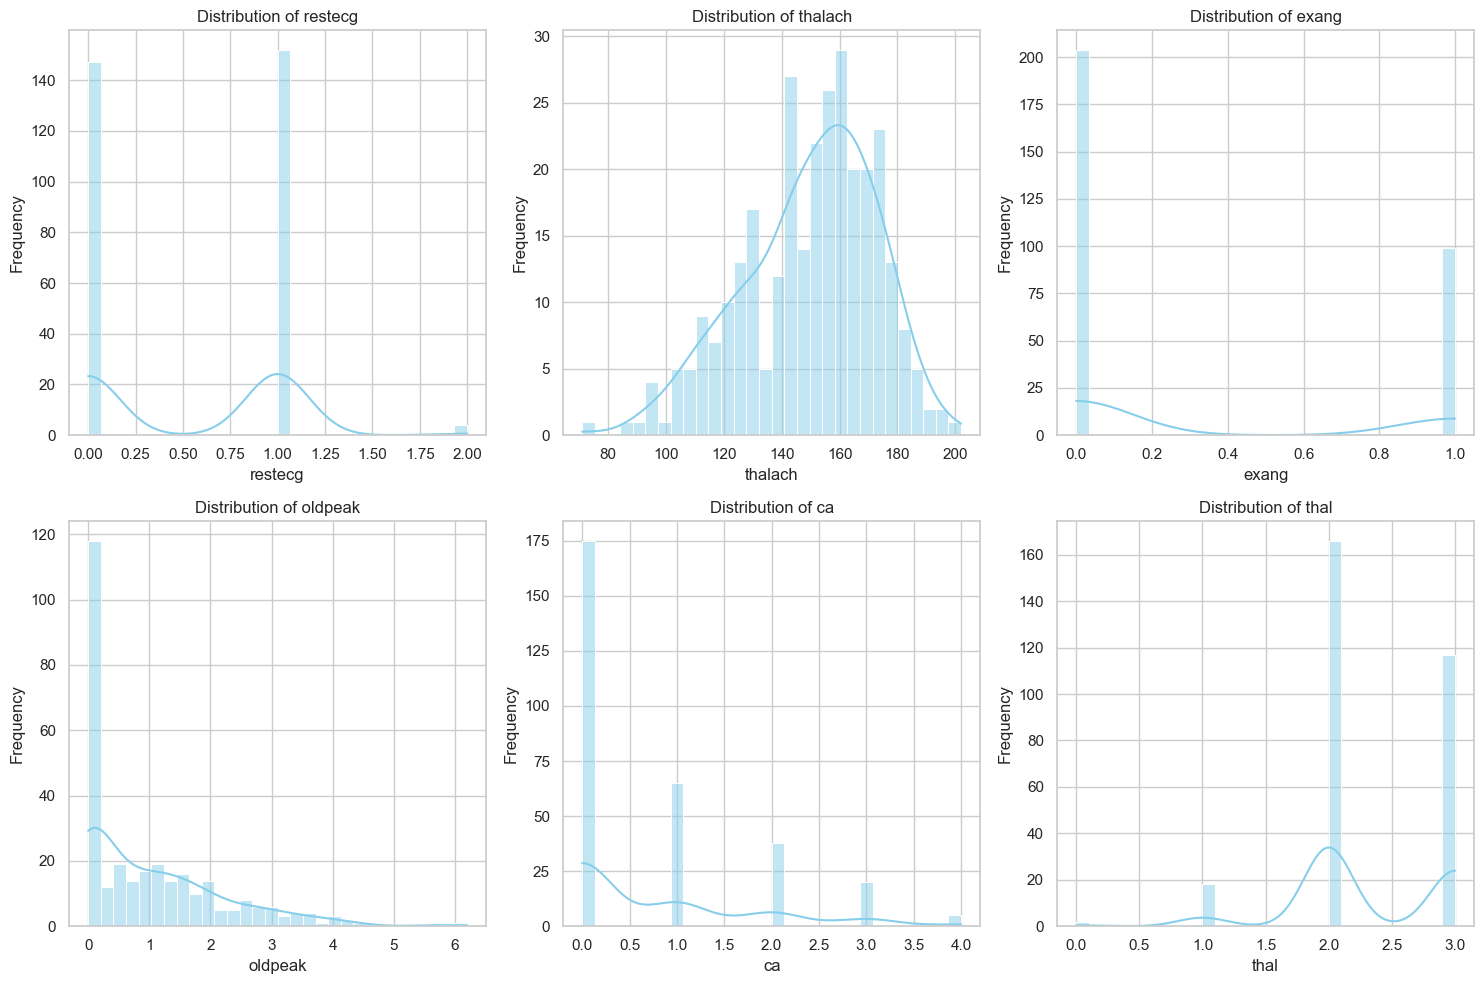

In [11]:
# Plot Histograms for Feature# Set a consistent style
sns.set(style='whitegrid')

# Define columns to plot
features = ['restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']

# Plot histograms
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

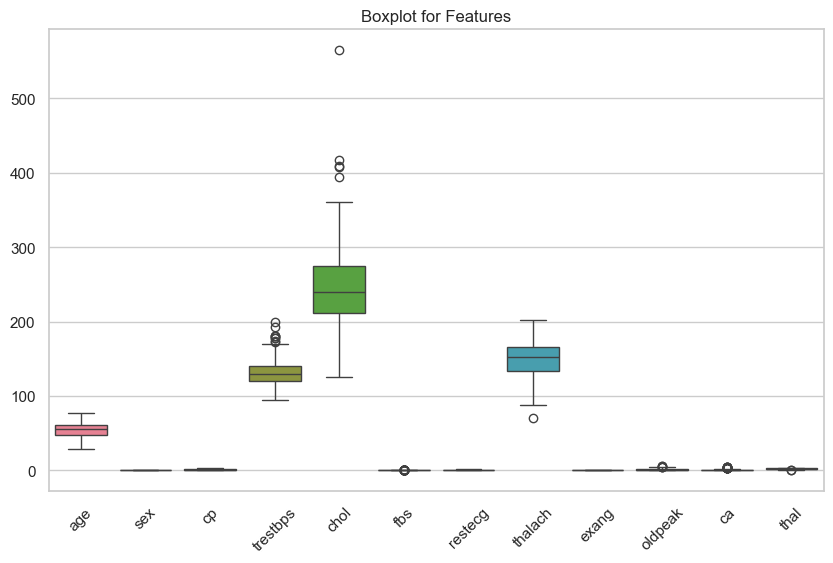

In [12]:

# Define the list of features to analyze
features_to_plot = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']

# Boxplot for detecting outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[features_to_plot])
plt.title('Boxplot for Features')
plt.xticks(rotation=45)
plt.show()

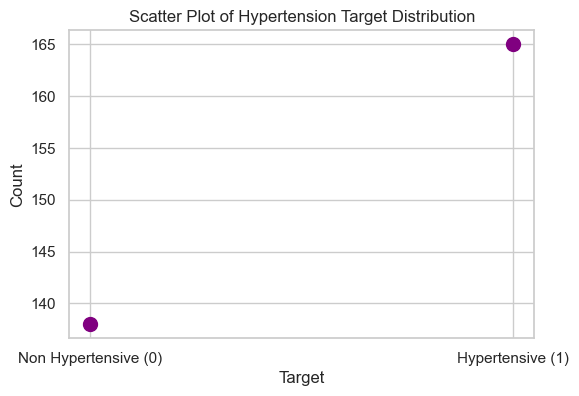

In [13]:
# Count each outcome
outcome_counts = df['target'].value_counts().sort_index()

# X and Y values for scatter plot
x = outcome_counts.index  # [0, 1]
y = outcome_counts.values  # [count_0, count_1]

# Plot as scatter
plt.figure(figsize=(6, 4))
plt.scatter(x, y, color='purple', s=100) 
plt.xticks([0, 1], ['Non Hypertensive (0)', 'Hypertensive (1)'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Scatter Plot of Hypertension Target Distribution')
plt.grid(True)
plt.show()

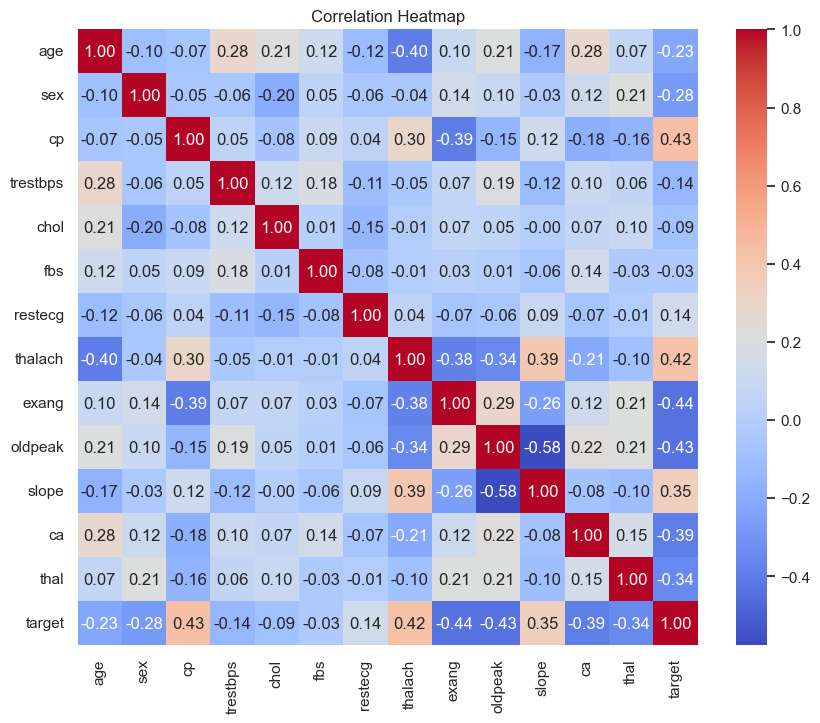

In [14]:
# Create a correlation heatmap to visualize the relationships between numerical features.
# Helps identify highly correlated variables which may affect model performance.

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [15]:

# Replace Zeros with NaN (only in certain columns)
invalid_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'ca']

# Replace 0 with NaN  in the selected columns
df[invalid_cols] = df[invalid_cols].replace(0, np.nan)

# Check how many missing values are now present
df.isnull().sum()

age           0
sex          96
cp          143
trestbps      0
chol          0
fbs         258
restecg     147
thalach       0
exang       204
oldpeak      99
slope         0
ca          175
thal          0
target        0
dtype: int64

In [16]:
# View the first few rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1.0,3.0,145,233,1.0,NaN,150,NaN,2.3,0,NaN,1,1
1,37,1.0,2.0,130,250,NaN,1.0,187,NaN,3.5,0,NaN,2,1
2,41,NaN,1.0,130,204,NaN,NaN,172,NaN,1.4,2,NaN,2,1
3,56,1.0,1.0,120,236,NaN,1.0,178,NaN,0.8,2,NaN,2,1
4,57,NaN,NaN,120,354,NaN,1.0,163,1.0,0.6,2,NaN,2,1


In [17]:
# View the last few rows
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,NaN,NaN,140,241,NaN,1.0,123,1.0,0.2,1,NaN,3,0
299,45,1.0,3.0,110,264,NaN,1.0,132,NaN,1.2,1,NaN,3,0
300,68,1.0,NaN,144,193,1.0,1.0,141,NaN,3.4,1,2.0,3,0
301,57,1.0,NaN,130,131,NaN,1.0,115,1.0,1.2,1,1.0,3,0
302,57,NaN,1.0,130,236,NaN,NaN,174,NaN,NaN,1,1.0,2,0


In [18]:
# Fill any missing values in the dataset with the median of each column.
# This helps maintain the distribution of the data and prevents errors during model training.

df. fillna (df.median(), inplace=True)

In [19]:
# View first few rows

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1.0,3.0,145,233,1.0,1.0,150,1.0,2.3,0,1.0,1,1
1,37,1.0,2.0,130,250,1.0,1.0,187,1.0,3.5,0,1.0,2,1
2,41,1.0,1.0,130,204,1.0,1.0,172,1.0,1.4,2,1.0,2,1
3,56,1.0,1.0,120,236,1.0,1.0,178,1.0,0.8,2,1.0,2,1
4,57,1.0,2.0,120,354,1.0,1.0,163,1.0,0.6,2,1.0,2,1


In [20]:
# View last few rows

df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,1.0,2.0,140,241,1.0,1.0,123,1.0,0.2,1,1.0,3,0
299,45,1.0,3.0,110,264,1.0,1.0,132,1.0,1.2,1,1.0,3,0
300,68,1.0,2.0,144,193,1.0,1.0,141,1.0,3.4,1,2.0,3,0
301,57,1.0,2.0,130,131,1.0,1.0,115,1.0,1.2,1,1.0,3,0
302,57,1.0,1.0,130,236,1.0,1.0,174,1.0,1.4,1,1.0,2,0


In [21]:
# Label data
df['Outcome'] = df['trestbps'].apply(lambda x: 1 if x >= 130 else 0)

# Check how many hypertensive vs non-hypertensive
print(df['Outcome'].value_counts())

Outcome
1    168
0    135
Name: count, dtype: int64


In [22]:
# Handle missing values if any
print("Missing values in each column:")
print(df.isnull().sum())

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']



Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
Outcome     0
dtype: int64


In [23]:
# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Model training
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Evaluate and select the best model
best_model = None
best_accuracy = 0
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model


Logistic Regression Accuracy: 0.8525
[[26  3]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61


Random Forest Accuracy: 0.8197
[[25  4]
 [ 7 25]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61


XGBoost Accuracy: 0.7705
[[24  5]
 [ 9 23]]
              precision    recall  f1-score   support

           0       0.73      0.83      0.77        29
           1       0.82      0.72      0.77        32

    accuracy                 

C:\Users\holuw\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:36:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [26]:
# Save the best model
import joblib
joblib.dump(best_model, 'best_hypertension_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print(f"Best model saved: {type(best_model).__name__} with accuracy {best_accuracy:.4f}")

Best model saved: LogisticRegression with accuracy 0.8525


In [27]:
# Create 5 mixed test samples manually or from the dataset
# This uses 3 hypertensive (1) and 2 non-hypertensive (0) cases

# Sample from each class
sample_positive = df[df['target'] == 1].sample(3, random_state=42)
sample_negative = df[df['target'] == 0].sample(2, random_state=42)

# Combine samples and reset index
test_samples = pd.concat([sample_positive, sample_negative]).reset_index(drop=True)

# Display the test samples
print("Test Samples:\n", test_samples)

# Separate features
X_test_manual = test_samples.drop('target', axis=1)
y_true = test_samples['target']

# Scale features using saved scaler
X_test_manual_scaled = scaler.transform(X_test_manual)

# Predict using the best model
y_pred = best_model.predict(X_test_manual_scaled)

# Show predictions
for i, (true, pred) in enumerate(zip(y_true, y_pred)):
    result = "✅ Correct" if true == pred else "❌ Incorrect"
    print(f"Sample {i+1}: True={true}, Predicted={pred} → {result}")


Test Samples:
    age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   49  1.0  2.0       130   269  1.0      1.0      163    1.0      1.4   
1   37  1.0  2.0       120   215  1.0      1.0      170    1.0      1.4   
2   49  1.0  1.0       134   271  1.0      1.0      162    1.0      1.4   
3   59  1.0  3.0       160   273  1.0      1.0      125    1.0      1.4   
4   46  1.0  2.0       120   249  1.0      1.0      144    1.0      0.8   

   slope   ca  thal  target  Outcome  
0      2  1.0     2       1        1  
1      2  1.0     2       1        0  
2      1  1.0     2       1        1  
3      2  1.0     2       0        1  
4      2  1.0     3       0        0  
Sample 1: True=1, Predicted=1 → ✅ Correct
Sample 2: True=1, Predicted=1 → ✅ Correct
Sample 3: True=1, Predicted=1 → ✅ Correct
Sample 4: True=0, Predicted=0 → ✅ Correct
Sample 5: True=0, Predicted=1 → ❌ Incorrect
